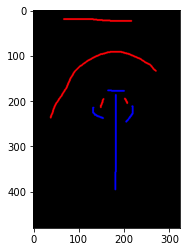

In [8]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img=cv2.imread("lady stroke 1.png")
img
plt.figure()
plt.imshow(img) 
plt.show()

In [107]:
import numpy as np
import cv2


# Reshape the seed image into a 2D array with each row representing a pixel
seed_image_reshaped = seed_image.reshape(-1, 3)

# Create a mask to filter out zero (black) pixels
non_zero_mask = np.any(seed_image_reshaped != [0, 0, 0], axis=1)

# Apply the mask to the reshaped seed image to get non-zero pixels
non_zero_pixels = seed_image_reshaped[non_zero_mask]

# Use numpy.unique to get unique non-zero pixels
unique_non_zero_pixels = np.unique(non_zero_pixels, axis=0)

# Print unique non-zero pixels
for pixel in unique_non_zero_pixels:
    print(pixel)


[  0   0 255]
[255   0   6]


In [93]:
import cv2
import numpy as np
import pandas as pd

def kmeans(X, k, max_iters=100, tolerance=1e-4):
    diff = 1
    n_samples, n_features = X.shape
    
    # Initialize cluster labels
    cluster = np.zeros(n_samples)

    # Randomly initialize centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    iteration = 0
    while diff and iteration < max_iters:
        # Assign data points to closest centroid
        for i, row in enumerate(X):
            min_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.linalg.norm(centroid - row)
                if min_dist > d:
                    min_dist = d
                    cluster[i] = idx

        # Update centroids
        new_centroids = np.array([X[cluster == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            diff = 0
        else:
            centroids = new_centroids

        iteration += 1

    return centroids, cluster


In [94]:
def k_means_clustering(k, data_points):
    cluster_centers_,labels_ = kmeans(data_points,k)
    return labels_, cluster_centers_


In [95]:
def extract_seed_pixels(image, seed_image):
    foreground = image[np.where((seed_image == [255, 0,6]).all(axis=2))]
    background = image[np.where((seed_image == [0, 0, 255]).all(axis=2))]
    return foreground, background


In [114]:
def likelihood(pixel, centroids, weights):
    distances = np.linalg.norm(pixel - centroids, axis=1)
    return np.sum(weights * np.exp(-distances))

def lazy_snapping(image, seed_image, N=64):
    foreground_seeds, background_seeds = extract_seed_pixels(image, seed_image)

    if len(foreground_seeds) == 0 or len(background_seeds) == 0:
        raise ValueError("Both foreground and background seed pixels must be provided.")

    foreground_labels, foreground_centroids = k_means_clustering(N, foreground_seeds)
    background_labels, background_centroids = k_means_clustering(N, background_seeds)

    foreground_weights = np.bincount(foreground_labels.astype(int)) / len(foreground_seeds)
    background_weights = np.bincount(background_labels.astype(int)) / len(background_seeds)


    segmented_image = np.zeros(image.shape[:2], dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i, j]
            p_foreground = likelihood(pixel, foreground_centroids, foreground_weights)
            p_background = likelihood(pixel, background_centroids, background_weights)

            if p_foreground > p_background:
                segmented_image[i, j] = 1

    return segmented_image

In [74]:
import glob
import re
li=glob.glob("*.png") 
li1=glob.glob("*stroke*.png")
l3 = [x for x in li if x not in li1]
l3

['lady.PNG', 'Mona-lisa.PNG', 'van Gogh.PNG']

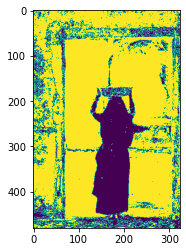

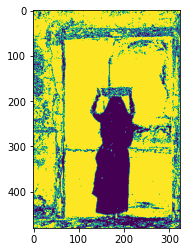

C:\Users\MAJIDA~1\AppData\Local\Temp/ipykernel_5996/4215321691.py:27: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[cluster == i].mean(axis=0) for i in range(k)])


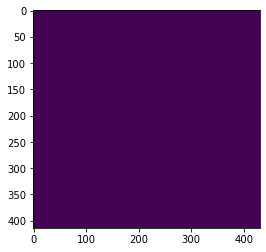

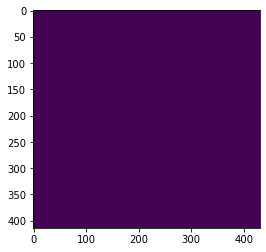

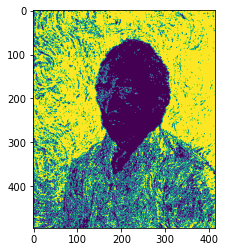

In [112]:
a=0
for i in li1:
    for j in li1:
        if re.search('lady',i):
            a=0
        elif re.search('Mona',i):
            a=1
        elif re.search('Gogh',i):
            a=2
    image = cv2.imread(l3[a])
    seed_image = cv2.imread(i)

    segmented_image = lazy_snapping(image, seed_image, N=64)

    # cv2.imwrite("segmented_image.jpg", segmented_image * 255)
    plt.figure()
    plt.imshow(segmented_image) 
    plt.show()
    

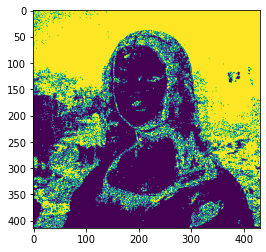

In [115]:
image = cv2.imread("Mona-lisa.PNG")
seed_image = cv2.imread("Mona-lisa stroke 1.png")

segmented_image = lazy_snapping(image, seed_image, N=64)

# cv2.imwrite("segmented_image.jpg", segmented_image * 255)
plt.figure()
plt.imshow(segmented_image) 
plt.show()

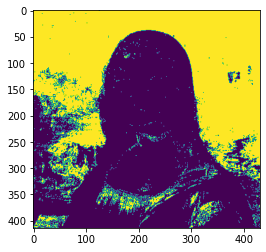

In [97]:


image = cv2.imread("Mona-lisa.PNG")
seed_image = cv2.imread("Mona-lisa stroke 2.png")

segmented_image = lazy_snapping(image, seed_image, N=64)

# cv2.imwrite("segmented_image.jpg", segmented_image * 255)
plt.figure()
plt.imshow(segmented_image) 
plt.show()